In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
contract_data = pd.read_csv('contract.csv')
internet_data = pd.read_csv('internet.csv')
personal_data = pd.read_csv('personal.csv')
phone_data = pd.read_csv('phone.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-nu

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Number of unique customers: 7043
Customers with internet service: 5517
Customers with phone service: 6361

Contract distribution: Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


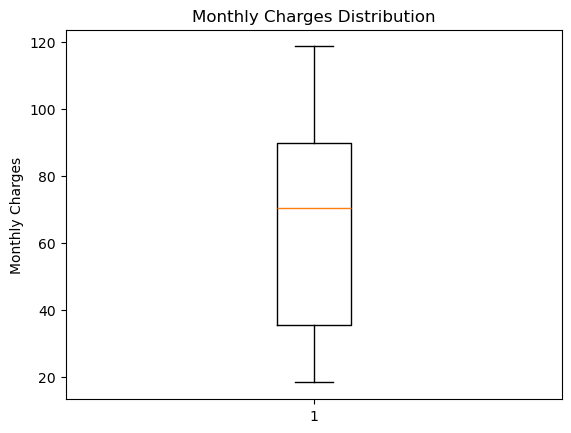

       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000


In [19]:
contract_data.info()
internet_data.info()
personal_data.info()
phone_data.info()

display(contract_data.head())
display(internet_data.head())
display(personal_data.head())
display(phone_data.head())

print('Number of unique customers:', contract_data['customerID'].nunique())
print('Customers with internet service:', internet_data['customerID'].nunique())
print('Customers with phone service:', phone_data['customerID'].nunique())

print('\nContract distribution:', contract_data['Type'].value_counts())

plt.boxplot(contract_data['MonthlyCharges'])
plt.title('Monthly Charges Distribution')
plt.ylabel('Monthly Charges')
plt.show()

print(contract_data.describe())

***---First impressions:***

*7,043 individual customers ['customerID']*

*5,517 customers have internet service(s)*

*6,361 customers have phone service*

*3,875 customers pay month to month*

*1,695 customers signed a 2-year service contract*

*1,473 customers signed a 1-year service contract*

*Monthly Price Range: 18.25 - 118.75*

*Median Price: 70.35*

***---Features that directly contribute to service cost:***

*['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']*

***---Features that may impact cost (senior discount?) but are nonetheless important:***

*['Type', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Partner', 'Dependants']*

***---Numerical Features:***

*['MonthlyCharges', 'TotalCharges']*

***---Prediction Target:***

*['EndDate']* *-Use start date to feature engineer 'Tenure' into the data set (months), remove start date from final data set (false trend acquisition)*

***---Features to remove:***

*['gender']* *-Has no predictive power*

*['TotalCharges']* *- Introduces multicollinearity after introducing 'Tenure' since this column can be mathematically derived from 'MonthlyCharges'*

***---Feature engineering:***

*['tenure'] for start - end date ('present' = 2020-02-01)*

*['has_internet', 'has_phone'] for the customers who have one service and not the other*

***---Questions:***

*Unit of currency for payment?*

*Contract type pricing differences? (Monthly, 1-Year, 2-Year)*

*Discounts for Senior Citizens, Large Families, Multiple Lines?*

*Paperless Billing incentives?*

*Price differences between DSL and Fiber Optic internet?*

*Cost of additional internet services? ('OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies')*

**Action Plan:**

1. Merge all data sets using ['CustomerID'] as the index, since not all customers pay for both internet and phone, I will be adding two columns of boolean dtype ['has_internet', 'has_phone'] to indicate which services each customer is paying for. Impute 'No Service' for NaN values in categorical feature columns after the merge if service is missing.

2. ['Tenure'] will be a new column introduced, reflecting time with service in months. This will have significant weight, customers with longer service times are typically lower-risk customers (churn). Convert ['BeginDate', 'EndDate'] to datetime dtype for easy ['Tenure'] calculations. Since there is an inferable relationship between tenure and monthly charges, total charges will be removed.

3. ['gender'] will be the only feature removed, seeing as it has no predictive power in the context of our task.

4. Scale numerical features, OHE categorical features, train models, tune hyperparameters when applicable. Use AUC-ROC & Accuracy as the scoring metrics for model results.

5. Study results, provide conclusion, recommendations, overall findings.

*Possible models to train: LogisticRegression, RandomForest, DecisionTree, XGBoost, LightGBM, CatBoost*  